# Natural Language Processing - Exercise

In [1]:
import nltk

## Download Stopwords package

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [*] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [*] basque_grammars..... Grammars for Basque
  [*] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [*] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [*] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [*] brown_tei........... Brown Corpus (TEI XML Version)
  [*] cess_cat............ CESS-CAT Treebank
  [*] cess_esp............ CESS-ESP Treebank
  [*] chat80.....

## Import SMS Spam Collection Data from UCI Maching Learning Repository

In [2]:
with open('smsspamcollection/SMSSpamCollection', 'r', encoding='utf-8') as f:
    messages = [line.rstrip() for line in f]

In [3]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
print(len(messages))

5574


In [8]:
for msg_no, message in enumerate(messages[:10]):
    print(msg_no, message, '\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [6]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [11]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [12]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [15]:
df.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [16]:
df['length'] = df['message'].apply(len)

In [18]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

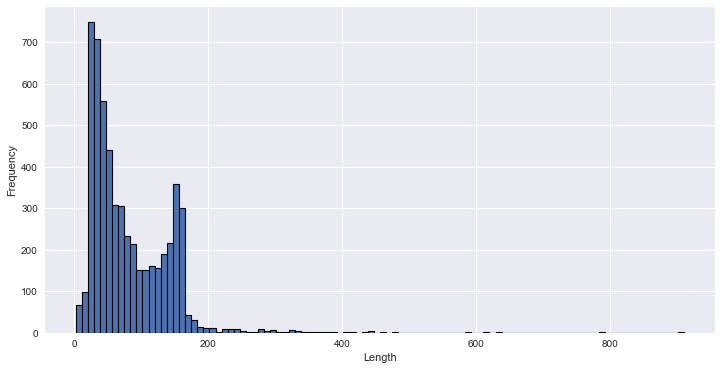

In [24]:
plt.figure(figsize=(12,6))
df['length'].hist(bins=100, edgecolor='black', linewidth=1.1)
plt.ylabel('Frequency')
plt.xlabel('Length')

In [25]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
df[df['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [37]:
df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209917C05F8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000209917E04E0>], dtype=object)

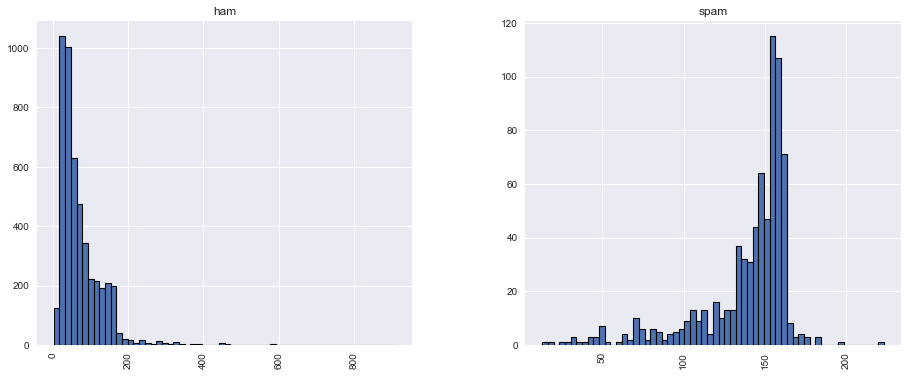

In [47]:
df.hist(column='length', by='label', bins=60, figsize=(15,6), edgecolor='black', linewidth=1.1)

# Text Pre-processing

In [49]:
import string

In [62]:
mess = "Sample message! Notice: it has punctuations!."

In [63]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
nopunc = [c for c in mess if c not in string.punctuation]

In [65]:
from nltk.corpus import stopwords

In [66]:
nopunc = ''.join(nopunc)

In [67]:
nopunc

'Sample message Notice it has punctuations'

In [68]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [69]:
clean_mess

['Sample', 'message', 'Notice', 'punctuations']

In [70]:
def text_process(mess):
    """
    1. remove punctuations
    2. remove stopwords
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [77]:
df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

In [82]:
print(len(bow_transformer.vocabulary_))

11425


In [102]:
mess4 = df['message'][3]
mess5 = df['message'][4]

print(mess4)
print(mess5)

U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [98]:
bow45 = bow_transformer.transform([mess4, mess5])

In [99]:
print(bow45)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
  (1, 2948)	1
  (1, 4777)	1
  (1, 6123)	1
  (1, 6877)	1
  (1, 7842)	1
  (1, 10433)	1
  (1, 10450)	1
  (1, 10799)	1


In [100]:
print(bow45.shape)

(2, 11425)


In [101]:
bow_transformer.get_feature_names()[10433]

'think'

** Now apply to whole data set **

In [103]:
bow_messages = bow_transformer.transform(df['message'])

In [105]:
print('shape of Matrix: ', bow_messages.shape)

shape of Matrix:  (5572, 11425)


In [106]:
bow_messages.nnz #non-zeros

50548

In [108]:
sparsity = (100.0 * bow_messages.nnz / (bow_messages.shape[0] * bow_messages.shape[1]))
print('Sparsity: {}'.format(sparsity))

Sparsity: 0.07940295412668218


## TF-IDF

In [109]:
from sklearn.feature_extraction.text import TfidfTransformer

In [128]:
tfidf_transformer = TfidfTransformer().fit(bow_messages)

In [129]:
tfidf45 = tfidf_transformer.transform(bow45)

In [130]:
print(tfidf45)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334
  (1, 10799)	0.401901546254
  (1, 10450)	0.354070044444
  (1, 10433)	0.270435802512
  (1, 7842)	0.445743727362
  (1, 6877)	0.354070044444
  (1, 6123)	0.240902262921
  (1, 4777)	0.310422627151
  (1, 2948)	0.401901546254


In [131]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['la']]

7.5462472458897007

In [132]:
messages_tfidf = tfidf_transformer.transform(bow_messages) 

In [133]:
print(messages_tfidf)

  (0, 11163)	0.230266855924
  (0, 10965)	0.190734285451
  (0, 8917)	0.247046523768
  (0, 8336)	0.170468692922
  (0, 7668)	0.264033840655
  (0, 7555)	0.312538562607
  (0, 6937)	0.183469241361
  (0, 6906)	0.151584746647
  (0, 6217)	0.189155577328
  (0, 5769)	0.24984711893
  (0, 5218)	0.268705938625
  (0, 5217)	0.298351840882
  (0, 4653)	0.312538562607
  (0, 2060)	0.242039602564
  (0, 1483)	0.312538562607
  (0, 1110)	0.288286201631
  (1, 11072)	0.400615609824
  (1, 10698)	0.206363748132
  (1, 8590)	0.504340590131
  (1, 7701)	0.376740107081
  (1, 3064)	0.291199541124
  (1, 2451)	0.561988811929
  (2, 11123)	0.191043872205
  (2, 11084)	0.158981453472
  (2, 10686)	0.139955408208
  :	:
  (5568, 6882)	0.313674697762
  (5568, 6691)	0.477810764018
  (5568, 6354)	0.557572104865
  (5568, 4880)	0.385312208609
  (5569, 10199)	0.520467167164
  (5569, 8252)	0.432829970906
  (5569, 3721)	0.520467167164
  (5569, 3228)	0.520467167164
  (5570, 11006)	0.204345259945
  (5570, 10787)	0.228678434865
  (5570, 9

## Training a model using Multinomial Naive_Bayes

In [134]:
from sklearn.naive_bayes import MultinomialNB

In [135]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['label'])

In [140]:
spam_detect_model.predict(tfidf45)

array(['ham', 'ham'], 
      dtype='<U4')

In [142]:
print(df['label'][3])
print(df['label'][4])

ham
ham


In [143]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [144]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], 
      dtype='<U4')

## Model Evaluation

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
msg_train, msg_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=52)

In [147]:
from sklearn.pipeline import Pipeline

In [148]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [149]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000020990E23C80>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [150]:
predictions = pipeline.predict(msg_test)

In [151]:
from sklearn.metrics import classification_report

In [152]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1444
       spam       1.00      0.73      0.84       228

avg / total       0.96      0.96      0.96      1672

